<a href="https://colab.research.google.com/github/ResearchMethodsGroupAssignment/Kaggle_Challenge_Team2/blob/main/Kaggle_team2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/ResearchMethodsGroupAssignment/Kaggle_Challenge_Team2/main/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/ResearchMethodsGroupAssignment/Kaggle_Challenge_Team2/main/test.csv')

* **PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.**
* **HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.**
* **CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.**
* **Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.**
* **Destination - The planet the passenger will be debarking to.**
* **Age - The age of the passenger.**
* **VIP - Whether the passenger has paid for special VIP service during the voyage.**
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.**
* **Name - The first and last names of the passenger.**
* **Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.**

**STATISTICAL ANALYSIS**

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.shape

(8693, 14)

In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
test_data.shape

(4277, 13)

In [8]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


# Missing value check


In [9]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Basic Exploratory Data Analysis

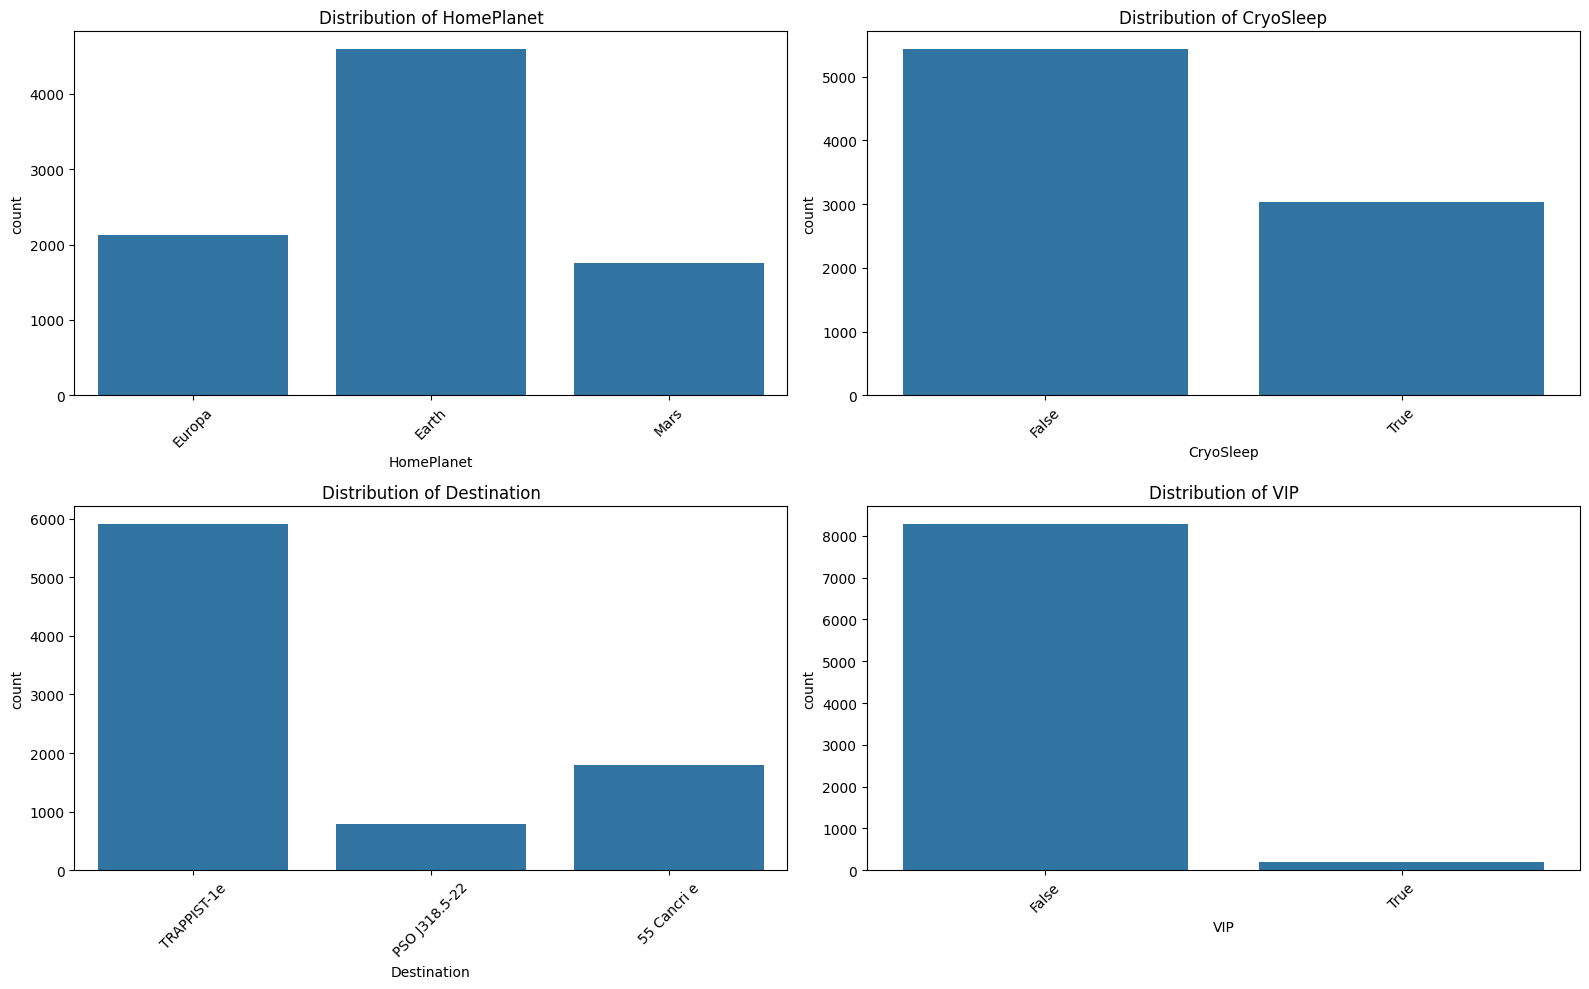

In [13]:
# Categorical Data Visualization
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

n_cols = 2  # Number of columns in subplot grid
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    # Plot on the ith subplot
    sns.countplot(x=column, data=train_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Above bar charts for HomePlanet, CryoSleep, Destination, and VIP status show that:
• Earth is the most common home planet among the passengers, followed by Europa and Mars.
• The majority of passengers were not in CryoSleep.
• The most popular destination is TRAPPIST-1e, far surpassing the other two destinations, PSO J318.5-22 and 55 Cancri e.
• Very few passengers have VIP status, indicating that this is an exclusive feature in the dataset.

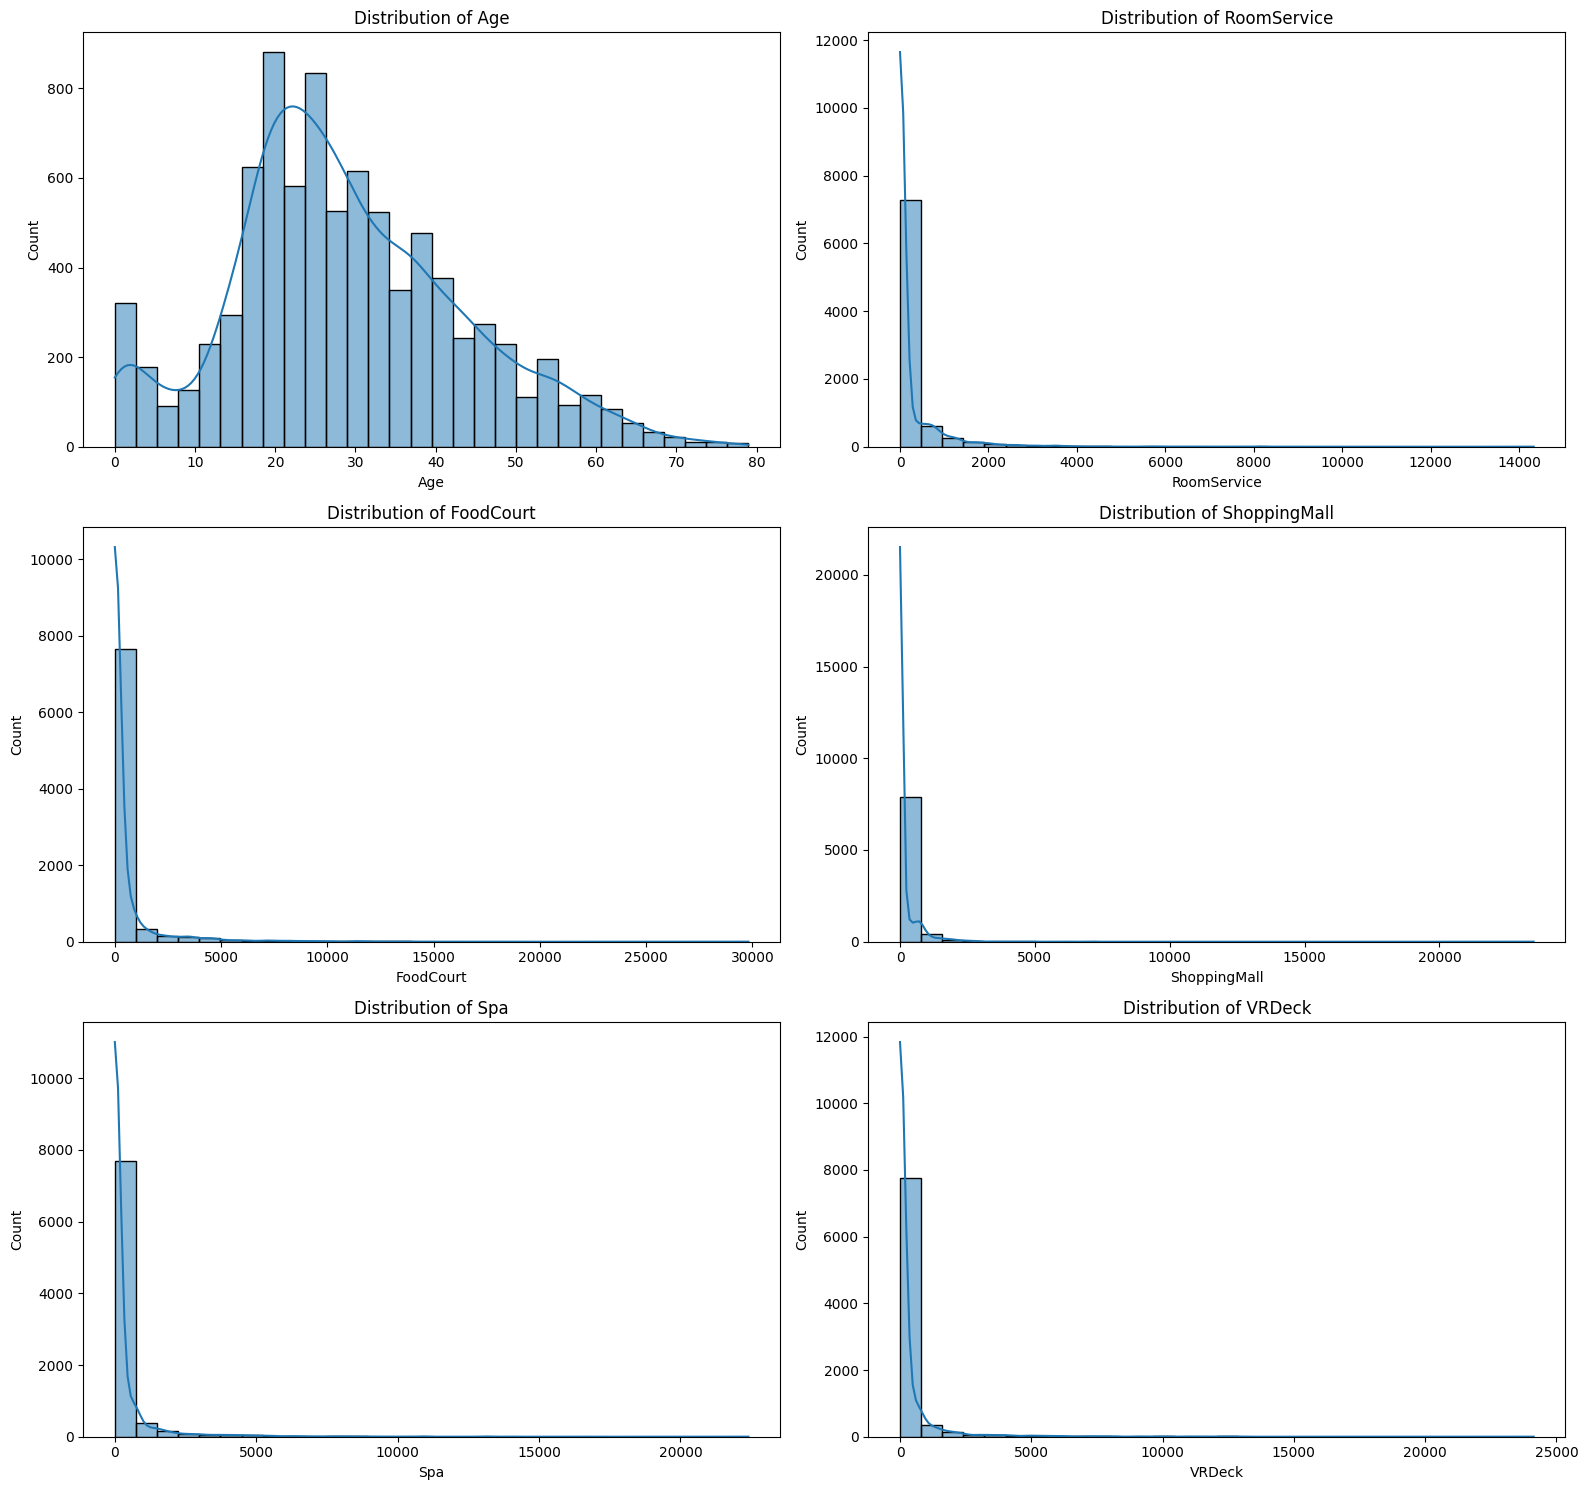

In [14]:
# Numerical Data Visualization
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

n_cols = 2  # Number of columns in subplot grid
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Plot on the ith subplot
    sns.histplot(train_data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: >

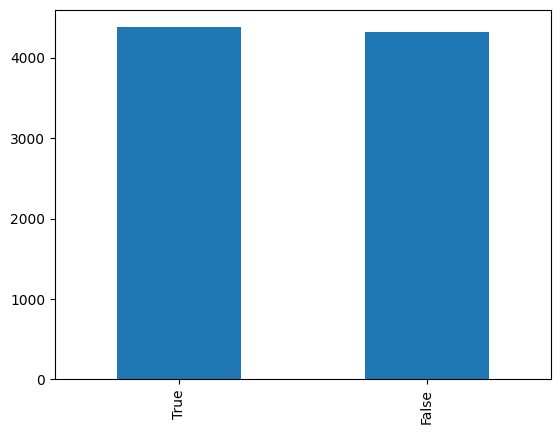

In [15]:
plot_df = train_data.Transported.value_counts()
plot_df.plot(kind="bar")

Advanced Ecploratory Data Analysis

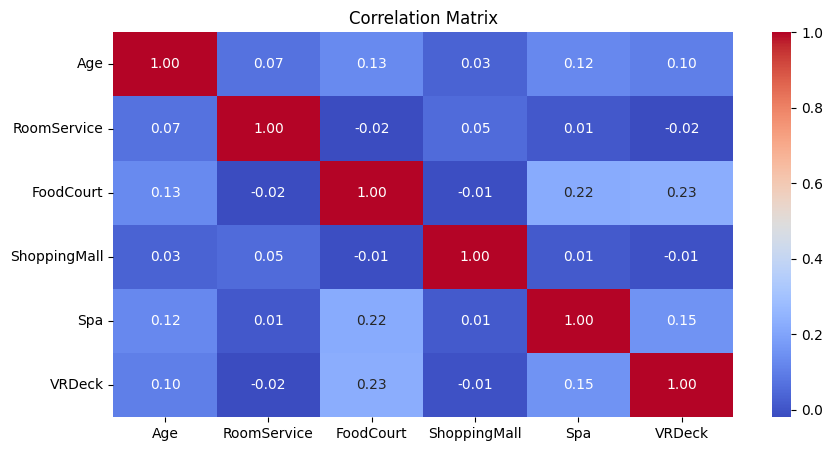

In [16]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(train_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

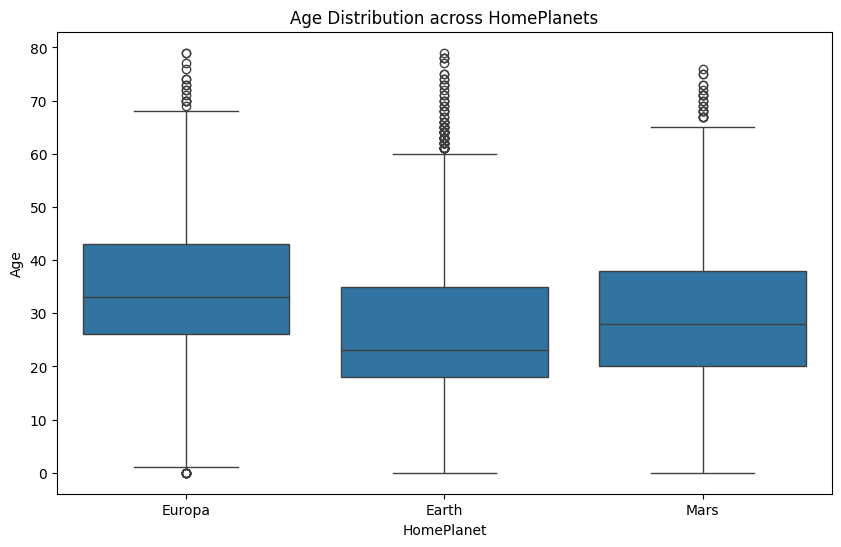

In [17]:
# Box Plot for Age across HomePlanets
plt.figure(figsize=(10, 6))
sns.boxplot(x='HomePlanet', y='Age', data=train_data)
plt.title('Age Distribution across HomePlanets')
plt.show()

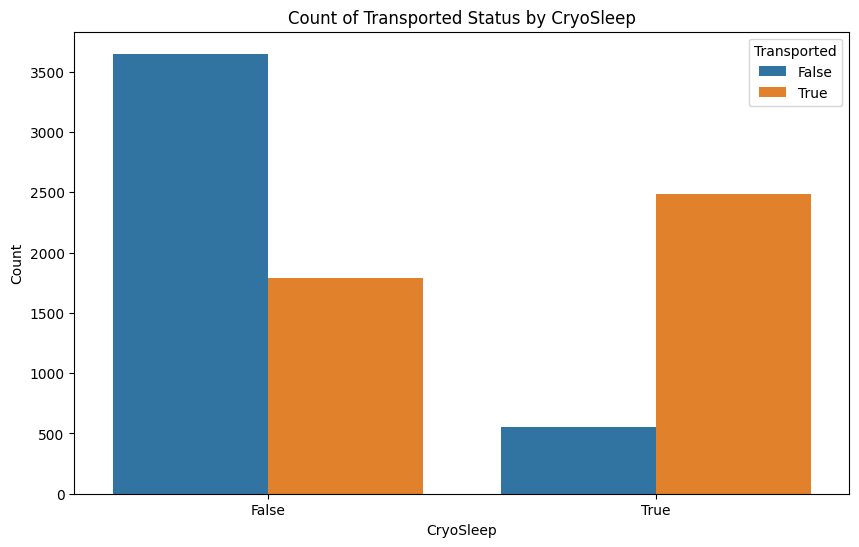

In [18]:
# Create a count plot with CryoSleep status and Transported status
plt.figure(figsize=(10, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=train_data)
plt.title('Count of Transported Status by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()

**Handling missing values with Imputation**


In [19]:
from sklearn.impute import SimpleImputer

# Numerical imputation
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numerical_imputer = SimpleImputer(strategy='mean')
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = numerical_imputer.transform(test_data[numerical_columns])

# Categorical imputation
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])
test_data[categorical_columns] = categorical_imputer.transform(test_data[categorical_columns])

#Splitting the Cabin field
train_data[['Deck','Num','Side']]= train_data['Cabin'].str.split('/',expand=True,)
test_data[['Deck','Num','Side']]= test_data['Cabin'].str.split('/',expand=True,)

#imputing Deck, Num, Side
for column in ['Deck', 'Num', 'Side']:
    imputer = SimpleImputer(strategy='most_frequent')
    train_data[column] = imputer.fit_transform(train_data[[column]])
    test_data[column] = imputer.transform(test_data[[column]])

#Dropping cabin and name
train_data = train_data.drop(columns=['Cabin','Name'])
test_data = test_data.drop(columns=['Cabin','Name'])

In [20]:
#Verifying null values
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

In [21]:
#Verifying null values
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64

In [22]:
#FEATURE ENGINEERING

# Creating a new binary feature for CryoSleep based on its distribution with respect to the target
train_data['CryoSleep_Flag'] = (train_data['CryoSleep'] == True).astype(int)
test_data['CryoSleep_Flag'] = (test_data['CryoSleep'] == True).astype(int)

# Creating a new feature TotalSpent as the sum of all amenities expenditures
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data['TotalSpent'] = train_data[amenities].sum(axis=1)
test_data['TotalSpent'] = test_data[amenities].sum(axis=1)

# Creating a binary feature for passengers not using any amenities
train_data['NoAmenitiesUsed'] = (train_data[amenities] == 0).all(axis=1).astype(int)
test_data['NoAmenitiesUsed'] = (test_data[amenities] == 0).all(axis=1).astype(int)

# Creating a binary feature for VIP status
train_data['VIP_Flag'] = (train_data['VIP'] == True).astype(int)
test_data['VIP_Flag'] = (test_data['VIP'] == True).astype(int)

train_data['GroupSize'] = train_data['PassengerId'].str.split('_', expand=True)[1].astype(int)
test_data['GroupSize'] = test_data['PassengerId'].str.split('_', expand=True)[1].astype(int)

# creating interaction terms between earth and age
train_data['IsChildOnEarth'] = ((train_data['Age'] <= 12) & (train_data['HomePlanet'] == 'Earth')).astype(int)
test_data['IsChildOnEarth'] = ((test_data['Age'] <= 12) & (test_data['HomePlanet'] == 'Earth')).astype(int)

In [23]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,Deck,Num,Side,CryoSleep_Flag,TotalSpent,NoAmenitiesUsed,VIP_Flag,GroupSize,IsChildOnEarth
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,False,B,0,P,0,0.0,1,0,1,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,True,F,0,S,0,736.0,0,0,1,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,False,A,0,S,0,10383.0,0,1,1,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,False,A,0,S,0,5176.0,0,0,2,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,True,F,1,S,0,1091.0,0,0,1,0


In [24]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,CryoSleep_Flag,TotalSpent,NoAmenitiesUsed,VIP_Flag,GroupSize,IsChildOnEarth
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,1,0.0,1,0,1,0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,0,2832.0,0,0,1,0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,1,0.0,1,0,1,0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,0,7418.0,0,0,1,0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,0,645.0,0,0,1,0


In [25]:
#Handling Outliers

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

train_data = cap_outliers(train_data, 'TotalSpent')
test_data = cap_outliers(test_data, 'TotalSpent')

In [26]:
# One hot encoding

columns_to_encode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

columns_to_encode = [col for col in columns_to_encode if col in train_data.columns]

train_data_encoded = pd.get_dummies(train_data, columns=columns_to_encode, drop_first=True)

test_data_encoded = pd.get_dummies(test_data, columns=columns_to_encode, drop_first=True)

In [27]:
test_data_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,CryoSleep_Flag,TotalSpent,...,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0,...,1,0,0,0,0,0,0,1,0,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,4,0,2832.0,...,1,0,0,0,0,0,1,0,0,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,3652.5,...,1,0,0,1,0,0,0,0,0,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,5,0,645.0,...,1,0,0,0,0,0,1,0,0,1


In [28]:
test_data_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,CryoSleep_Flag,TotalSpent,...,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0,...,1,0,0,0,0,0,0,1,0,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,4,0,2832.0,...,1,0,0,0,0,0,1,0,0,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,3652.5,...,1,0,0,1,0,0,0,0,0,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,5,0,645.0,...,1,0,0,0,0,0,1,0,0,1


**Visualising after Data cleaning and One hot encoding**

<ipython-input-29-6df3261150e5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data_encoded.corr()


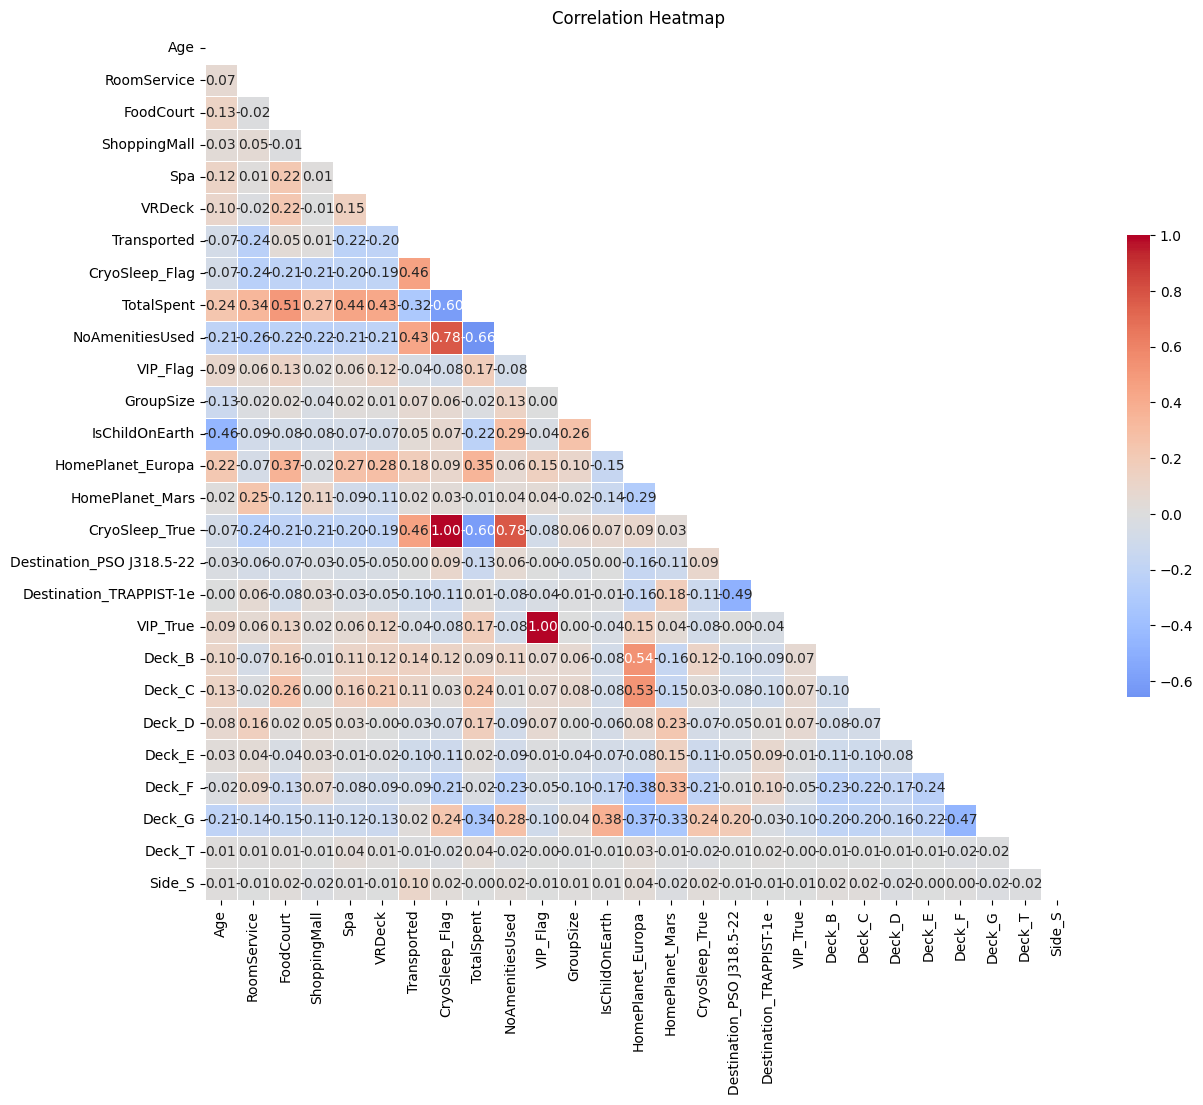

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that 'data_encoded' is your DataFrame after one-hot encoding
# Calculate the correlation matrix including the target variable
correlation_matrix = train_data_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

# It may be useful to add title and adjust ticks for clarity, depending on the number of features
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Creating a model

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
train_data['Transported'] = train_data['Transported'].replace({True:1,False:0})

In [32]:
#Need to use encoded dataset
X = train_data_encoded.drop(['Transported','PassengerId','Num'],axis=1)
y = train_data_encoded['Transported']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [34]:
RF = RandomForestClassifier(random_state=42)
LGR = LogisticRegression()
KNN = KNeighborsClassifier()
SVM = SVC()
NB = GaussianNB()

#Logistic Regression

In [35]:
LGR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred_LGR = LGR.predict(X_test)

In [37]:
confusion_matrix(y_test,pred_LGR)

array([[808, 274],
       [204, 888]])

In [38]:
print(f'accuracy : {accuracy_score(y_test,pred_LGR)}')

accuracy : 0.7801287948482061


# K neighbour Classifier

In [39]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
pred_KNN = KNN.predict(X_test)

In [41]:
confusion_matrix(y_test,pred_KNN)

array([[806, 276],
       [230, 862]])

In [42]:
print(f'accuracy : {accuracy_score(y_test,pred_KNN)}')

accuracy : 0.7672493100275989


# Support vector machine

In [43]:
SVM.fit(X_train, y_train)

SVC()

In [44]:
pred_SVM = SVM.predict(X_test)

In [45]:
confusion_matrix(y_test,pred_SVM)

array([[745, 337],
       [170, 922]])

In [46]:
print(f'accuracy : {accuracy_score(y_test,pred_SVM)}')

accuracy : 0.7667893284268629


#XG Boost

In [47]:
# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42, enable_categorical=True
)

In [48]:
# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [49]:
# Predict the labels for the test set
xgb_pred = xgb_classifier.predict(X_test)

In [50]:
confusion_matrix(y_test,xgb_pred)

array([[832, 250],
       [200, 892]])

In [51]:
print(f'accuracy : {accuracy_score(y_test,xgb_pred)}')

accuracy : 0.7930082796688133


# Comparing gradient boost with random forest classifier

In [52]:
#MODEL TRAINING
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Assume 'X' to be the features and 'y' to be the target variable
test_data_prepared = train_data.drop(['PassengerId'], axis=1)
X = train_data_encoded.drop(['PassengerId', 'Transported'], axis=1)  # Drop the target variable
y = train_data_encoded['Transported']  # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV for both classifiers
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.7, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the classifiers
gb_clf = GradientBoostingClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object for both classifiers
gb_random_cv = RandomizedSearchCV(gb_clf, gb_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_cv = RandomizedSearchCV(rf_clf, rf_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the models
print("Tuning Gradient Boosting Classifier...")
gb_random_cv.fit(X_train, y_train)

print("Tuning Random Forest Classifier...")
rf_random_cv.fit(X_train, y_train)

# Get the best estimator
best_gb_clf = gb_random_cv.best_estimator_
best_rf_clf = rf_random_cv.best_estimator_

# Make predictions using the best models
gb_predictions = best_gb_clf.predict(X_test)
rf_predictions = best_rf_clf.predict(X_test)

# Evaluate the best model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Accuracy with hyperparameter tuning for Gradient Boost: {gb_accuracy:.4f}")

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy with hyperparameter tuning for Random Forest: {rf_accuracy:.4f}")

Tuning Gradient Boosting Classifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuning Random Forest Classifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy with hyperparameter tuning for Gradient Boost: 0.8010
Accuracy with hyperparameter tuning for Random Forest: 0.7982


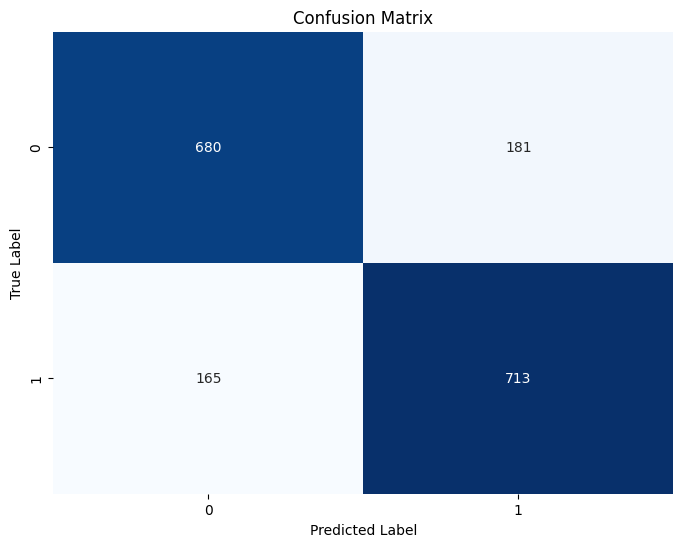

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, gb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Classification Report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, gb_predictions))

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

       False       0.80      0.79      0.80       861
        True       0.80      0.81      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



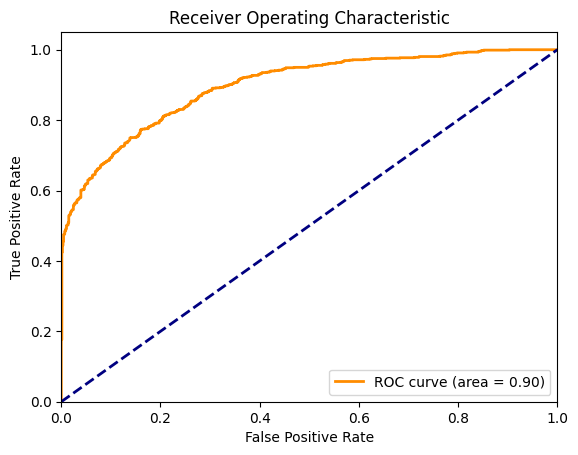

In [56]:
#ROC CURVE for GradientBoost
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, best_gb_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Plotting Shapley values

PREPARING PREDICTIONS FOR SUBMISSION

In [57]:
!pip install shap

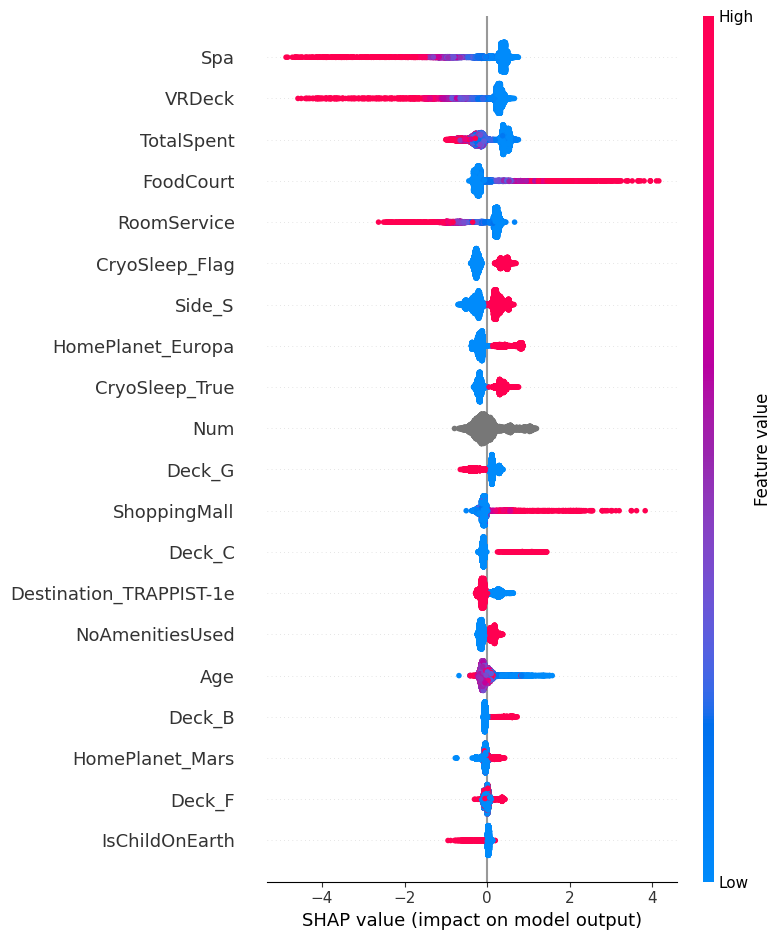

In [58]:
import shap

explainer = shap.TreeExplainer(best_gb_clf)
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values, X_train)